In [ ]:
exfrom google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!gdown 1f6jT_MSh9D5srF1-gLD-AKuCnDs-EzwF

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1f6jT_MSh9D5srF1-gLD-AKuCnDs-EzwF 



In [ ]:
!unzip DL_Assignment_1_Data.zip

unzip:  cannot find or open DL_Assignment_1_Data.zip, DL_Assignment_1_Data.zip.zip or DL_Assignment_1_Data.zip.ZIP.


In [ ]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers, Input
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Conv2D,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPool2D, AveragePooling2D
from tensorflow.keras.layers import ReLU, concatenate
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
classes = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose']


In [ ]:
#Rescale is a value by which we will multiply the data before any other processing.
#Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process
#so we target values between 0 and 1 instead by scaling with a 1/255. factor 

train_gen = ImageDataGenerator(rescale = 1./255 , validation_split = 0.1)

valid_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)

test_gen  = ImageDataGenerator(rescale = 1./255)

In [ ]:
type(train_gen)

keras.preprocessing.image.ImageDataGenerator

In [ ]:
b_s = 64
target = (224,224)
train_set = train_gen.flow_from_directory(directory= '/content/Data/train', 
                                         target_size= target,
                                          class_mode= 'sparse',
                                          subset='training',
                                          batch_size= b_s)
valid_set = valid_gen.flow_from_directory(directory='/content/Data/train',
                                           target_size= target,
                                          class_mode= 'sparse',
                                          subset='validation',
                                          batch_size= b_s)
test_set = test_gen.flow_from_directory(directory='/content/Data/test',
                                         target_size= target,
                                          class_mode= 'sparse',
                                          batch_size= b_s)

FileNotFoundError: ignored

In [ ]:
for i in range(train_set.num_classes):
   img,l = train_set.next()
   print("Photo of class", i+1)
   plt.imshow(img[0])
   plt.show()
train_set.reset

In [ ]:
!nvidia-smi

Thu Nov 17 15:51:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##SIMPLE MODEL

In [ ]:
model = Sequential()
#number of filters 32 , 3x3 kernel size , 
model.add(Conv2D(32, (3, 3), activation='relu',  padding='same', input_shape=train_set.image_shape)) 
# total of 32 filters, kernal size(3,3)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', trainable = False))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', trainable = False))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', trainable = False))
model.add(MaxPooling2D((2, 2)))
# example output part of the model
model.add(Flatten())
model.add(Dense(4096, activation='relu'))# fully connected layer
model.add(Dense(104, actax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                  

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/DL_Data/tmp'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
   monitor='val_loss',
    verbose=1, 
    save_weights_only=True,
    save_best_only=True,
    mode='min')

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#calling the stopped training model
model.load_weights('/content/drive/MyDrive/DL_Data/tmp')

In [ ]:
history = model.fit(
    train_set,
    verbose = 1,
    epochs = 20,
    validation_data= valid_set,
    callbacks=[model_checkpoint_callback]
)
model.save(name="model")

In [ ]:
y_probs = model.predict(test_set)
y_preds = y_probs.argmax(axis=1)

In [ ]:
y_preds.shape

In [ ]:
f1 = f1_score(test_set.labels, y_preds, average='macro')
cm = confusion_matrix(test_set.labels, y_preds)
print(f1, "\n", cm)

In [ ]:
cm=confusion_matrix(y_preds,test_set.labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(104,104))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

#Plot the training Accuracy vs Validation Accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation Accurarcy')
plt.legend()

plt.show()

In [ ]:
_, acc = model.evaluate(test_set, steps=len(test_set), verbose=0)
print('%.3f' % (acc * 100.0))

##ALEXNET MODEL

In [ ]:
model1 = Sequential()
#model1.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=train_set.image_shape))
model1.add(layers.Conv2D(96, 11, strides=4, padding='same', input_shape=train_set.image_shape))
model1.add(layers.Lambda(tf.nn.local_response_normalization))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(3, strides=2))
model1.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model1.add(layers.Lambda(tf.nn.local_response_normalization))
model1.add(layers.Activation('relu'))
model1.add(layers.MaxPooling2D(3, strides=2))
model1.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model1.add(layers.Activation('relu'))
model1.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model1.add(layers.Activation('relu'))
model1.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model1.add(layers.Activation('relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(4096, activation='relu'))
model1.add(layers.Dropout(0.5)) # --> prevents overfitting
model1.add(layers.Dense(4096, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(104, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                                 
 lambda_1 (Lambda)           (None, 7, 7, 256)         0         
                                                        

In [ ]:
model1.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               loss='sparse_categorical_crossentropy',
               metrics='accuracy')

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/DL_Data/alexnet'
model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
   monitor='val_loss',
    verbose=1, 
    save_best_only=True,
    mode='min')
    


In [ ]:
history1 = model1.fit(
    train_set,
    epochs = 20,
    validation_data = valid_set,
    
   callbacks=[model_checkpoint_callback1]
)
model1.save(name="model1")

Epoch 1/20
181/181 [==============================] - ETA: 0s - loss: 4.4286 - accuracy: 0.0564
Epoch 1: val_loss improved from inf to 4.12979, saving model to /content/drive/MyDrive/DL_Data/alexnet


181/181 [==============================] - 53s 243ms/step - loss: 4.4286 - accuracy: 0.0564 - val_loss: 4.1298 - val_accuracy: 0.0602
Epoch 2/20
181/181 [==============================] - ETA: 0s - loss: 4.1948 - accuracy: 0.0604
Epoch 2: val_loss did not improve from 4.12979
181/181 [==============================] - 41s 225ms/step - loss: 4.1948 - accuracy: 0.0604 - val_loss: 4.1396 - val_accuracy: 0.0635
Epoch 3/20
181/181 [==============================] - ETA: 0s - loss: 4.1928 - accuracy: 0.0610
Epoch 3: val_loss improved from 4.12979 to 4.12243, saving model to /content/drive/MyDrive/DL_Data/alexnet


181/181 [==============================] - 48s 263ms/step - loss: 4.1928 - accuracy: 0.0610 - val_loss: 4.1224 - val_accuracy: 0.0635
Epoch 4/20
181/181 [==============================] - ETA: 0s - loss: 4.1870 - accuracy: 0.0598
Epoch 4: val_loss did not improve from 4.12243
181/181 [==============================] - 40s 223ms/step - loss: 4.1870 - accuracy: 0.0598 - val_loss: 4.1349 - val_accuracy: 0.0602
Epoch 5/20
181/181 [==============================] - ETA: 0s - loss: 4.1893 - accuracy: 0.0579
Epoch 5: val_loss did not improve from 4.12243
181/181 [==============================] - 41s 226ms/step - loss: 4.1893 - accuracy: 0.0579 - val_loss: 4.1258 - val_accuracy: 0.0602
Epoch 6/20
181/181 [==============================] - ETA: 0s - loss: 4.1848 - accuracy: 0.0559
Epoch 6: val_loss improved from 4.12243 to 4.12050, saving model to /content/drive/MyDrive/DL_Data/alexnet


181/181 [==============================] - 44s 244ms/step - loss: 4.1848 - accuracy: 0.0559 - val_loss: 4.1205 - val_accuracy: 0.0635


In [ ]:
f1 = f1_score(test_set.labels, y_preds, average='macro')
cm = confusion_matrix(test_set.labels, y_preds)
print(f1, "\n", cm)

In [ ]:
cm=confusion_matrix(y_preds,test_set.labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(104,104))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [ ]:
acc1 = history1.history['accuracy']
val_acc1 = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

#Plot the training Accuracy vs Validation Accuracy
plt.plot(epochs, acc1, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc1, 'r', label='Validation accurarcy')
plt.title('Training and Validation Accurarcy')
plt.legend()

plt.show()

##VGG

In [ ]:
model2 = Sequential()
model2.add(Conv2D(input_shape=train_set.image_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model2.add(Flatten())
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dense(units=104, activation="softmax"))
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/DL_Data/vgg'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
   monitor='val_loss',
    verbose=1, 
    save_best_only=True,
    mode='min')

In [ ]:
history2 = model2.fit(
    train_set,
    verbose = 1,
    epochs = 20,
    validation_data = valid_set,
    callbacks=[model_checkpoint_callback2]
)
model2.save("model2")

Epoch 1/20
181/181 [==============================] - ETA: 0s - loss: 32752076.0000 - accuracy: 0.0189
Epoch 1: val_loss improved from inf to 4.48875, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 182s 897ms/step - loss: 32752076.0000 - accuracy: 0.0189 - val_loss: 4.4887 - val_accuracy: 0.0163
Epoch 2/20
181/181 [==============================] - ETA: 0s - loss: 4.3672 - accuracy: 0.0495
Epoch 2: val_loss improved from 4.48875 to 4.24242, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 161s 887ms/step - loss: 4.3672 - accuracy: 0.0495 - val_loss: 4.2424 - val_accuracy: 0.0570
Epoch 3/20
181/181 [==============================] - ETA: 0s - loss: 4.2259 - accuracy: 0.0549
Epoch 3: val_loss improved from 4.24242 to 4.15515, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 162s 896ms/step - loss: 4.2259 - accuracy: 0.0549 - val_loss: 4.1551 - val_accuracy: 0.0570
Epoch 4/20
181/181 [==============================] - ETA: 0s - loss: 4.1812 - accuracy: 0.0555
Epoch 4: val_loss improved from 4.15515 to 4.12910, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 164s 906ms/step - loss: 4.1812 - accuracy: 0.0555 - val_loss: 4.1291 - val_accuracy: 0.0635
Epoch 5/20
181/181 [==============================] - ETA: 0s - loss: 4.1693 - accuracy: 0.0611
Epoch 5: val_loss improved from 4.12910 to 4.12110, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 163s 899ms/step - loss: 4.1693 - accuracy: 0.0611 - val_loss: 4.1211 - val_accuracy: 0.0635
Epoch 6/20
181/181 [==============================] - ETA: 0s - loss: 4.1665 - accuracy: 0.0611
Epoch 6: val_loss improved from 4.12110 to 4.11865, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 162s 896ms/step - loss: 4.1665 - accuracy: 0.0611 - val_loss: 4.1186 - val_accuracy: 0.0635
Epoch 7/20
181/181 [==============================] - ETA: 0s - loss: 4.1658 - accuracy: 0.0579
Epoch 7: val_loss improved from 4.11865 to 4.11748, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 163s 899ms/step - loss: 4.1658 - accuracy: 0.0579 - val_loss: 4.1175 - val_accuracy: 0.0635
Epoch 8/20
181/181 [==============================] - ETA: 0s - loss: 4.1656 - accuracy: 0.0611
Epoch 8: val_loss improved from 4.11748 to 4.11696, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 161s 889ms/step - loss: 4.1656 - accuracy: 0.0611 - val_loss: 4.1170 - val_accuracy: 0.0635
Epoch 9/20
181/181 [==============================] - ETA: 0s - loss: 4.1657 - accuracy: 0.0611
Epoch 9: val_loss did not improve from 4.11696
181/181 [==============================] - 155s 857ms/step - loss: 4.1657 - accuracy: 0.0611 - val_loss: 4.1170 - val_accuracy: 0.0635
Epoch 10/20
181/181 [==============================] - ETA: 0s - loss: 4.1658 - accuracy: 0.0600
Epoch 10: val_loss did not improve from 4.11696
181/181 [==============================] - 152s 840ms/step - loss: 4.1658 - accuracy: 0.0600 - val_loss: 4.1171 - val_accuracy: 0.0635
Epoch 11/20
181/181 [==============================] - ETA: 0s - loss: 4.1659 - accuracy: 0.0611
Epoch 11: val_loss improved from 4.11696 to 4.11675, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 162s 896ms/step - loss: 4.1659 - accuracy: 0.0611 - val_loss: 4.1168 - val_accuracy: 0.0635
Epoch 12/20
181/181 [==============================] - ETA: 0s - loss: 4.1659 - accuracy: 0.0593
Epoch 12: val_loss did not improve from 4.11675
181/181 [==============================] - 153s 844ms/step - loss: 4.1659 - accuracy: 0.0593 - val_loss: 4.1169 - val_accuracy: 0.0635
Epoch 13/20
181/181 [==============================] - ETA: 0s - loss: 4.1658 - accuracy: 0.0611
Epoch 13: val_loss did not improve from 4.11675
181/181 [==============================] - 152s 842ms/step - loss: 4.1658 - accuracy: 0.0611 - val_loss: 4.1171 - val_accuracy: 0.0635
Epoch 14/20
181/181 [==============================] - ETA: 0s - loss: 4.1661 - accuracy: 0.0607
Epoch 14: val_loss did not improve from 4.11675
181/181 [==============================] - 152s 842ms/step - loss: 4.1661 - accuracy: 0.0607 - val_loss: 4.1171 - val_accuracy: 0.0635
Epoch 15/20
181/181 [====

181/181 [==============================] - 162s 892ms/step - loss: 4.1663 - accuracy: 0.0603 - val_loss: 4.1167 - val_accuracy: 0.0635
Epoch 17/20
181/181 [==============================] - ETA: 0s - loss: 4.1664 - accuracy: 0.0611
Epoch 17: val_loss improved from 4.11668 to 4.11661, saving model to /content/drive/MyDrive/DL_Data/vgg


181/181 [==============================] - 163s 897ms/step - loss: 4.1664 - accuracy: 0.0611 - val_loss: 4.1166 - val_accuracy: 0.0635
Epoch 18/20
181/181 [==============================] - ETA: 0s - loss: 4.1660 - accuracy: 0.0599
Epoch 18: val_loss did not improve from 4.11661
181/181 [==============================] - 152s 836ms/step - loss: 4.1660 - accuracy: 0.0599 - val_loss: 4.1168 - val_accuracy: 0.0635
Epoch 19/20
181/181 [==============================] - ETA: 0s - loss: 4.1662 - accuracy: 0.0597
Epoch 19: val_loss did not improve from 4.11661
181/181 [==============================] - 153s 843ms/step - loss: 4.1662 - accuracy: 0.0597 - val_loss: 4.1170 - val_accuracy: 0.0635
Epoch 20/20
181/181 [==============================] - ETA: 0s - loss: 4.1661 - accuracy: 0.0600
Epoch 20: val_loss did not improve from 4.11661
181/181 [==============================] - 153s 842ms/step - loss: 4.1661 - accuracy: 0.0600 - val_loss: 4.1171 - val_accuracy: 0.0635


TypeError: ignored

In [ ]:
model2.save("model2")

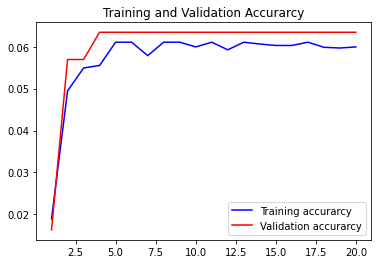

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

epochs = range(1, len(acc2) + 1)

#Plot the training Accuracy vs Validation Accuracy
plt.plot(epochs, acc2, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc2, 'r', label='Validation accurarcy')
plt.title('Training and Validation Accurarcy')
plt.legend()

plt.show()

In [ ]:
y_probs2 = model2.predict(test_set)
y_preds2 = y_probs2.argmax(axis=1)

200/200 [==============================] - 60s 297ms/step


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
f1 = f1_score(test_set.labels, y_preds2, average='macro')
cm = confusion_matrix(test_set.labels, y_preds2)
print(f1, "\n", cm)

0.0011110795373817169 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cm=confusion_matrix(y_preds2,test_set.labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(104,104))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [ ]:
_, acc = model2.evaluate(test_set, steps=len(test_set), verbose=0)
print('%.3f' % (acc * 100.0))

6.132


## GoogleNet/Inception

In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu', trainable = False)(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu', trainable = False)(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [ ]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = train_set.image_shape)

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(104, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(104, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(104, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [ ]:
#model3 = Sequential()
model3 = GoogLeNet()
model3.load_weights("/content/drive/MyDrive/DL_Data/google")

In [ ]:
model3.summary()

In [ ]:
model3.compile(
     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history3 = model3.fit(
    train_set,
    verbose = 1,
    epochs = 20,
    validation_data = valid_set
)
model3.save("model3")

In [ ]:
y_probs3 = model3.predict(test_set)

 46/200 [=====>........................] - ETA: 27s

In [ ]:
y_probs3=np.array(y_probs3)

In [ ]:
y_preds3 = y_probs3.argmax(axis=1)

In [ ]:
y_probs3 = y_probs3.reshape(3*3712,104)

In [ ]:
y_probs3.shape

In [ ]:
f1 = f1_score(test_set.labels, y_probs3, average='macro')
cm = confusion_matrix(test_set.labels, y_probs3)
print(f1, "\n", cm)

In [ ]:
cm3=confusion_matrix(y_preds3,test_set.labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=classes)
fig, ax = plt.subplots(figsize=(104,104))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [ ]:
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

epochs = range(1, len(acc) + 1)

#Plot the training Accuracy vs Validation Accuracy
plt.plot(epochs, acc3, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc3, 'r', label='Validation accurarcy')
plt.title('Training and Validation Accurarcy')
plt.legend()

plt.show()

##ENSEMBLE

In [ ]:
input_layer = Input(shape = train_set.image_shape)

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu', trainable = False)(X)
  # max-pooling layer: pool_size = (3,3), strides = 2
X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block

X = Conv2D(filters=32, kernel_size=(3,3), padding='same', strides=(2,2), trainable = False)(X)
X = AveragePooling2D(pool_size=(2,2), padding='same')(X)
X = Inception_block(X, f1 = 32, f2_conv1 = 48, f2_conv3 = 64, f3_conv1 = 4, f3_conv5 = 16, f4 = 16)
X = GlobalAveragePooling2D(name = 'GAPL')(X)
X = (Dense(4096, activation = 'relu', trainable = False)) (X)
X = (Dense(104, activation = 'softmax')) (X)
X = Dropout(0.5)(X)
model4 = Model(input_layer, [X])
model4.summary()

In [ ]:
model4.compile(
     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history4 = model4.fit(
    train_set,
    verbose = 1,
    epochs = 20,
    validation_data = valid_set
)
model4.save(name="model4")

In [ ]:
y_probs4 = model4.predict(test_set)
y_preds4 = y_probs4.argmax(axis=1)

In [ ]:
f1 = f1_score(test_set.labels, y_preds4, average='macro')
cm4 = confusion_matrix(test_set.labels, y_preds4)
print(f1, "\n", cm4)

In [ ]:
cm4=confusion_matrix(y_preds4,test_set.labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=classes)
fig, ax = plt.subplots(figsize=(104,104))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

epochs = range(1, len(acc) + 1)

#Plot the training Accuracy vs Validation Accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation Accurarcy')
plt.legend()

plt.show()

##Pretrained

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
modelP = keras.models.Sequential()
modelP.add(VGG16 (weights='imagenet',pooling='avg'))

modelP.add(Dense(units=104, activation="softmax"))
modelP.summary ()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 dense_1 (Dense)             (None, 104)               104104    
                                                                 
Total params: 138,461,648
Trainable params: 138,461,648
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelP.compile(
     optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
historyP = modelP.fit(
    train_set,
    verbose = 1,
    epochs = 20,
    validation_data = valid_set

)


In [ ]:
modelP.save("modelP")

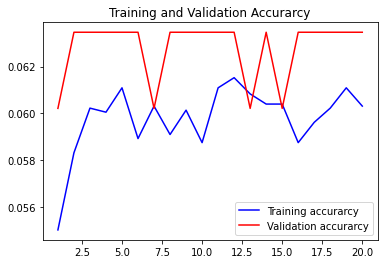

In [ ]:
accP = historyP.history['accuracy']
val_accP = historyP.history['val_accuracy']

epochs = range(1, len(accP) + 1)

#Plot the training Accuracy vs Validation Accuracy
plt.plot(epochs, accP, 'b', label='Training accurarcy')
plt.plot(epochs, val_accP, 'r', label='Validation accurarcy')
plt.title('Training and Validation Accurarcy')
plt.legend()

plt.show()

In [ ]:
y_probsP = modelP.predict(test_set)
y_predsP = y_probsP.argmax(axis=1)

200/200 [==============================] - 67s 337ms/step


In [ ]:
f1 = f1_score(test_set.labels, y_predsP, average='macro')
cm = confusion_matrix(test_set.labels, y_predsP)
print(f1, "\n", cm)

0.0011110795373817169 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
cm=confusion_matrix(y_predsP,test_set.labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(104,104))
disp.plot(ax=ax, xticks_rotation='vertical')
plt.show()

In [ ]:
_, acc = modelP.evaluate(test_set, steps=len(test_set), verbose=0)
print('%.3f' % (acc * 100.0))

6.132
